In [3]:
import sys
!{sys.executable} -m pip install matplotlib seaborn pandas numpy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [3]:
# Connect to SQLite database
db_path = '../diabetes_health.db'  # Adjust path if needed
conn = sqlite3.connect(db_path)

# Load the main table
df = pd.read_sql_query("SELECT * FROM health_indicators", conn)

# Load the cleaned view
df_clean = pd.read_sql_query("SELECT * FROM diabetes_analysis_view", conn)

print(f"✅ Data loaded successfully")
print(f"Total records: {len(df):,}")
print(f"\nDataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")

✅ Data loaded successfully
Total records: 253,680

Dataset shape: (253680, 22)

Column names:
['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [4]:
# Display first few rows
print("=" * 80)
print("FIRST 5 ROWS (Raw Data)")
print("=" * 80)
display(df.head())

print("\n" + "=" * 80)
print("FIRST 5 ROWS (Cleaned View)")
print("=" * 80)
display(df_clean.head())

# Data types and info
print("\n" + "=" * 80)
print("DATA TYPES AND MEMORY USAGE")
print("=" * 80)
df.info()

FIRST 5 ROWS (Raw Data)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



FIRST 5 ROWS (Cleaned View)


,Diabetes_binary,age_group,gender,income_level,BMI,HighBP,HighChol,Smoker,PhysActivity,GenHlth,bmi_category
0,0.0,60-64,Female,3.0,40.0,1.0,1.0,1.0,0.0,5.0,Obese
1,0.0,50-54,Female,1.0,25.0,0.0,0.0,1.0,1.0,3.0,Overweight
2,0.0,60-64,Female,8.0,28.0,1.0,1.0,0.0,0.0,5.0,Overweight
3,0.0,70-74,Female,6.0,27.0,1.0,0.0,0.0,1.0,2.0,Overweight
4,0.0,70-74,Female,4.0,24.0,1.0,1.0,0.0,1.0,2.0,Normal Weight



DATA TYPES AND MEMORY USAGE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               2

In [5]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES CHECK")
print("=" * 80)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "✅ No missing values found!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n📊 Duplicate rows: {duplicates}")

# Basic statistics
print("\n" + "=" * 80)
print("DESCRIPTIVE STATISTICS")
print("=" * 80)
display(df.describe())

MISSING VALUES CHECK
✅ No missing values found!

📊 Duplicate rows: 24206

DESCRIPTIVE STATISTICS


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00
mean,0.14,0.43,0.42,0.96,28.38,0.44,0.04,0.09,0.76,0.63,0.81,0.06,0.95,0.08,2.51,3.18,4.24,0.17,0.44,8.03,5.05,6.05
std,0.35,0.49,0.49,0.19,6.61,0.50,0.20,0.29,0.43,0.48,0.39,0.23,0.22,0.28,1.07,7.41,8.72,0.37,0.50,3.05,0.99,2.07
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,8.00,5.00,7.00
75%,0.00,1.00,1.00,1.00,31.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,3.00,2.00,3.00,0.00,1.00,10.00,6.00,8.00
max,1.00,1.00,1.00,1.00,98.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


BUSINESS QUESTION 1: Diabetes Prevalence
              Status  Count  Percentage
         No Diabetes 218334       86.07
Diabetes/Prediabetes  35346       13.93


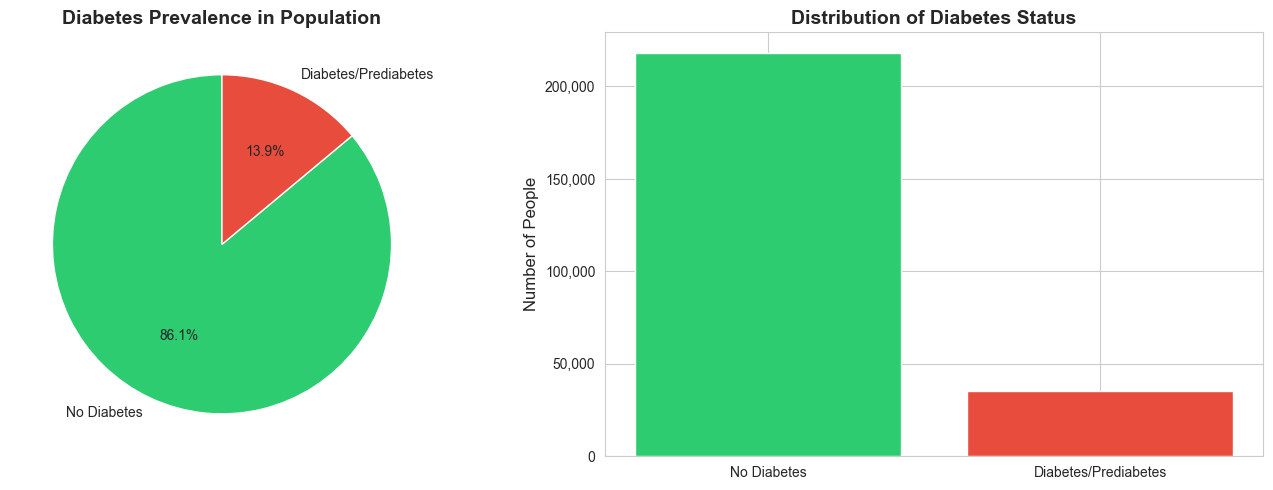


💡 KEY INSIGHT: 13.9% of the population has diabetes or prediabetes


In [6]:
# Q1: What percentage of the population has diabetes?
print("=" * 80)
print("BUSINESS QUESTION 1: Diabetes Prevalence")
print("=" * 80)

diabetes_counts = df['Diabetes_binary'].value_counts()
diabetes_pct = df['Diabetes_binary'].value_counts(normalize=True) * 100

prevalence_df = pd.DataFrame({
    'Status': ['No Diabetes', 'Diabetes/Prediabetes'],
    'Count': diabetes_counts.values,
    'Percentage': diabetes_pct.values
})

print(prevalence_df.to_string(index=False))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#2ecc71', '#e74c3c']
ax1.pie(diabetes_pct.values, labels=['No Diabetes', 'Diabetes/Prediabetes'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Diabetes Prevalence in Population', fontsize=14, fontweight='bold')

# Bar chart
ax2.bar(['No Diabetes', 'Diabetes/Prediabetes'], diabetes_counts.values, color=colors)
ax2.set_ylabel('Number of People', fontsize=12)
ax2.set_title('Distribution of Diabetes Status', fontsize=14, fontweight='bold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.savefig('../images/01_diabetes_prevalence.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💡 KEY INSIGHT: {diabetes_pct.values[1]:.1f}% of the population has diabetes or prediabetes")

BUSINESS QUESTION 2: Diabetes Rate by Age Group
age_group  Total_People  Diabetes_Cases  Diabetes_Rate
    18-24          5700            78.0           1.37
    25-29          7598           140.0           1.84
    30-34         11123           314.0           2.82
    35-39         13823           626.0           4.53
    40-44         16157          1051.0           6.50
    45-49         19819          1742.0           8.79
    50-54         26314          3088.0          11.74
    55-59         30832          4263.0          13.83
    60-64         33244          5733.0          17.25
    65-69         32194          6558.0          20.37
    70-74         23533          5141.0          21.85
    75-79         15980          3403.0          21.30
      80+         17363          3209.0          18.48


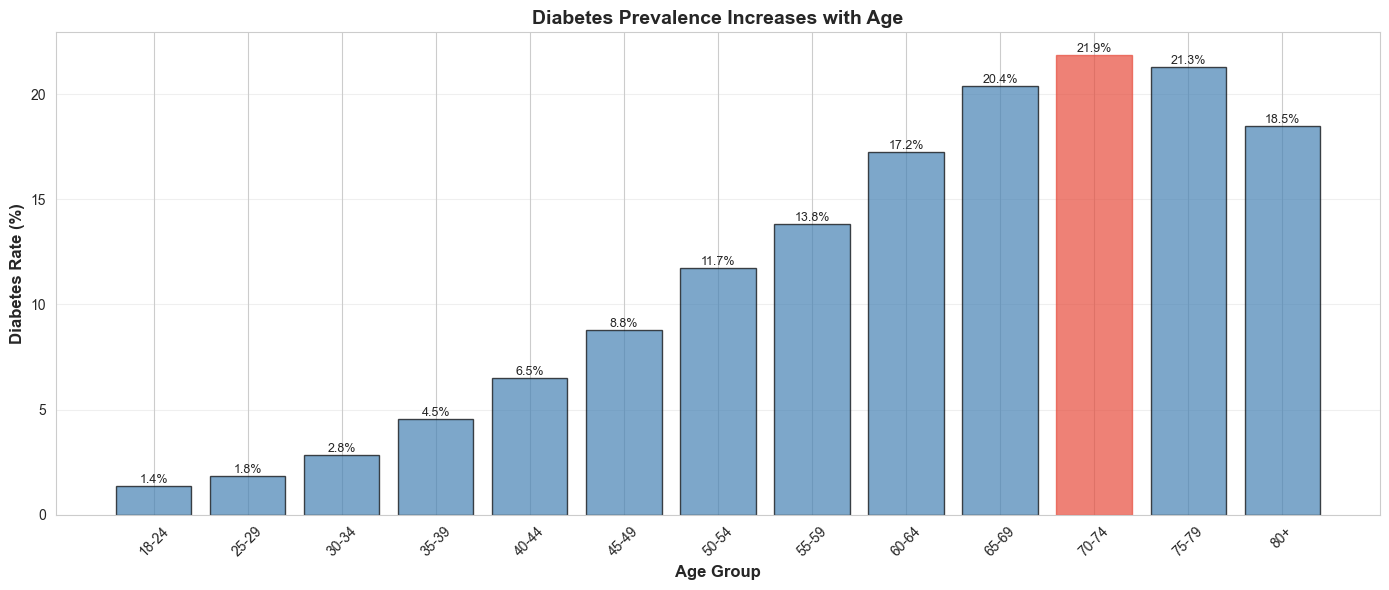


💡 KEY INSIGHT: Age group '70-74' has the highest diabetes rate at 21.9%


In [7]:
# Q2: Diabetes rates by age group
print("=" * 80)
print("BUSINESS QUESTION 2: Diabetes Rate by Age Group")
print("=" * 80)

age_analysis = df_clean.groupby('age_group').agg({
    'Diabetes_binary': ['count', 'sum', 'mean']
}).round(4)

age_analysis.columns = ['Total_People', 'Diabetes_Cases', 'Diabetes_Rate']
age_analysis['Diabetes_Rate'] = age_analysis['Diabetes_Rate'] * 100
age_analysis = age_analysis.reset_index()

# Sort by age order
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
             '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
age_analysis['age_group'] = pd.Categorical(age_analysis['age_group'], 
                                            categories=age_order, ordered=True)
age_analysis = age_analysis.sort_values('age_group')

print(age_analysis.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(age_analysis['age_group'], age_analysis['Diabetes_Rate'], 
              color='steelblue', edgecolor='black', alpha=0.7)

# Highlight highest risk age groups
max_rate_idx = age_analysis['Diabetes_Rate'].idxmax()
bars[max_rate_idx].set_color('#e74c3c')

ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Diabetes Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Diabetes Prevalence Increases with Age', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('../images/02_diabetes_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

highest_risk_age = age_analysis.loc[age_analysis['Diabetes_Rate'].idxmax(), 'age_group']
highest_rate = age_analysis['Diabetes_Rate'].max()
print(f"\n💡 KEY INSIGHT: Age group '{highest_risk_age}' has the highest diabetes rate at {highest_rate:.1f}%")

Diabetes Rate by Gender
        Total_People  Diabetes_Cases  Diabetes_Rate
gender                                             
Female        141974         18411.0          12.97
Male          111706         16935.0          15.16

Diabetes Rate by Income Level
 income_level  Total_People  Diabetes_Cases  Diabetes_Rate
          1.0          9811          2383.0          24.29
          2.0         11783          3086.0          26.19
          3.0         15994          3568.0          22.31
          4.0         20135          4054.0          20.13
          5.0         25883          4504.0          17.40
          6.0         36470          5291.0          14.51
          7.0         43219          5265.0          12.18
          8.0         90385          7195.0           7.96


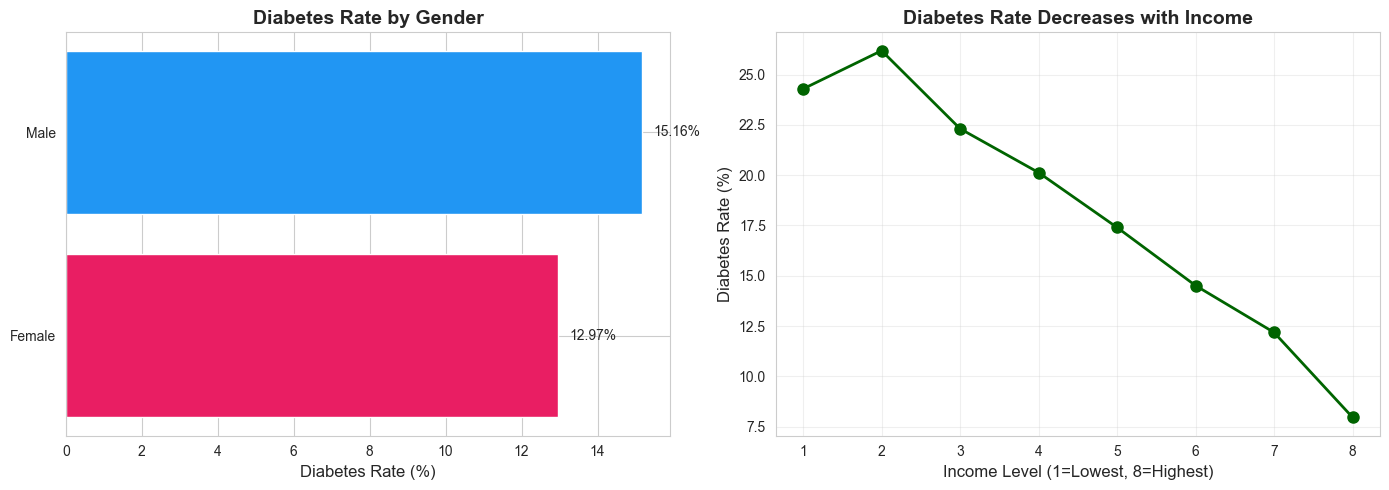


💡 KEY INSIGHT: Lower income groups have significantly higher diabetes rates


In [8]:
# Q2b: Gender analysis
print("=" * 80)
print("Diabetes Rate by Gender")
print("=" * 80)

gender_analysis = df_clean.groupby('gender').agg({
    'Diabetes_binary': ['count', 'sum', 'mean']
}).round(4)
gender_analysis.columns = ['Total_People', 'Diabetes_Cases', 'Diabetes_Rate']
gender_analysis['Diabetes_Rate'] = gender_analysis['Diabetes_Rate'] * 100
print(gender_analysis)

# Q2c: Income analysis
print("\n" + "=" * 80)
print("Diabetes Rate by Income Level")
print("=" * 80)

income_analysis = df_clean.groupby('income_level').agg({
    'Diabetes_binary': ['count', 'sum', 'mean']
}).round(4)
income_analysis.columns = ['Total_People', 'Diabetes_Cases', 'Diabetes_Rate']
income_analysis['Diabetes_Rate'] = income_analysis['Diabetes_Rate'] * 100
income_analysis = income_analysis.reset_index()
print(income_analysis.to_string(index=False))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gender comparison
gender_data = gender_analysis.reset_index()
ax1.barh(gender_data['gender'], gender_data['Diabetes_Rate'], color=['#e91e63', '#2196f3'])
ax1.set_xlabel('Diabetes Rate (%)', fontsize=12)
ax1.set_title('Diabetes Rate by Gender', fontsize=14, fontweight='bold')
for i, v in enumerate(gender_data['Diabetes_Rate']):
    ax1.text(v + 0.3, i, f'{v:.2f}%', va='center')

# Income trend
ax2.plot(income_analysis['income_level'], income_analysis['Diabetes_Rate'], 
         marker='o', linewidth=2, markersize=8, color='darkgreen')
ax2.set_xlabel('Income Level (1=Lowest, 8=Highest)', fontsize=12)
ax2.set_ylabel('Diabetes Rate (%)', fontsize=12)
ax2.set_title('Diabetes Rate Decreases with Income', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../images/03_gender_income_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💡 KEY INSIGHT: Lower income groups have significantly higher diabetes rates")

BUSINESS QUESTION 3: Health Risk Factors
                      Avg BMI  High BP (%)  High Chol (%)  \
No Diabetes             27.81         38.0           38.0   
Diabetes/Prediabetes    31.94         75.0           67.0   

                      Avg Gen Health (1-5)  Physically Active (%)  
No Diabetes                           2.39                   78.0  
Diabetes/Prediabetes                  3.29                   63.0  


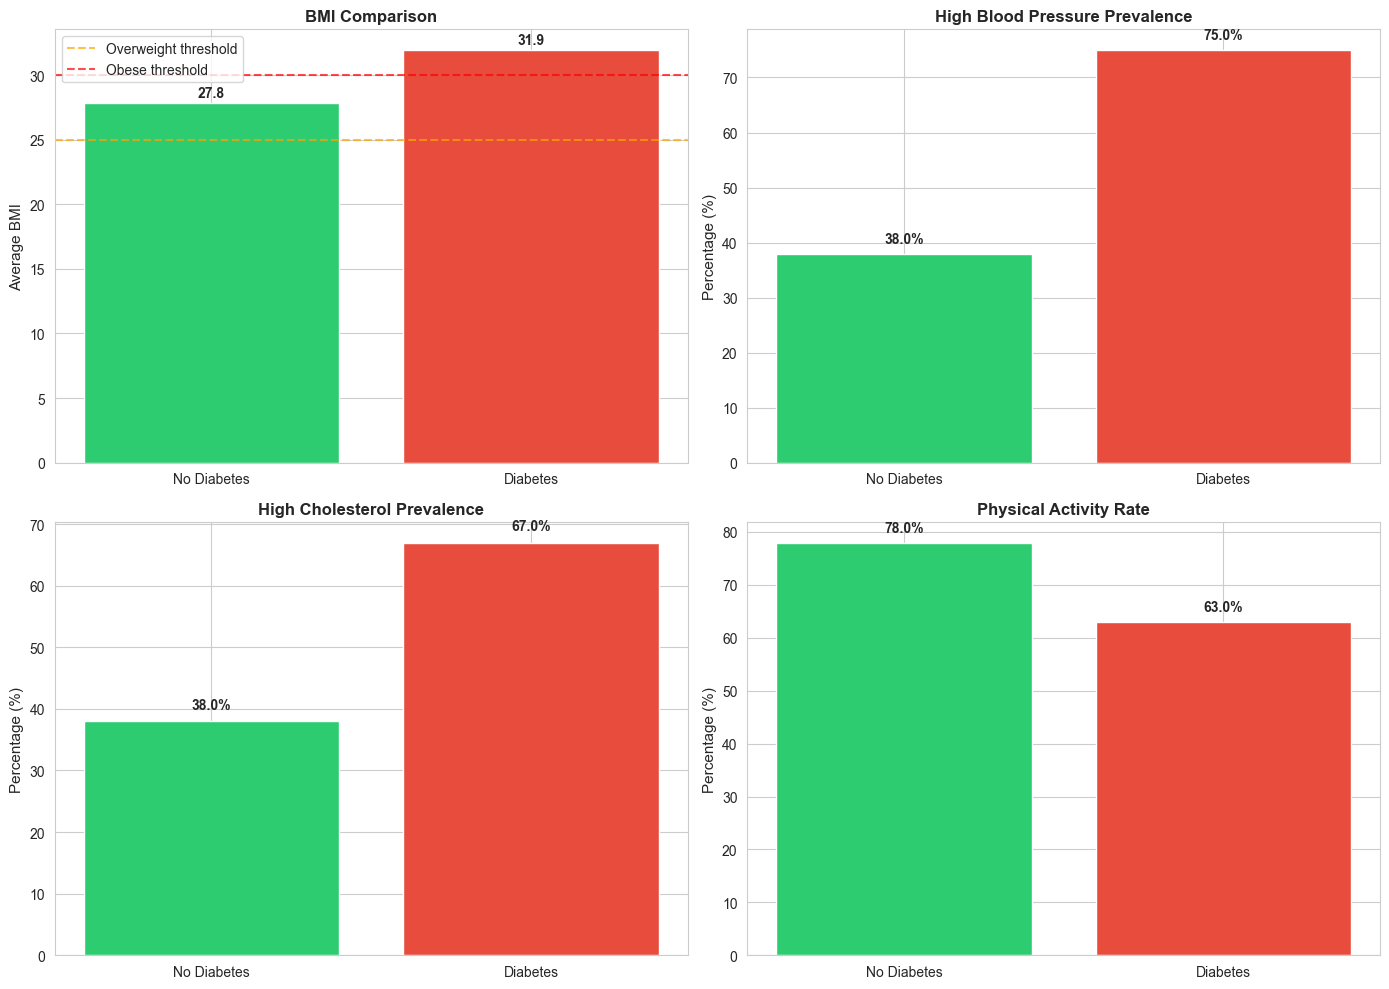


💡 KEY INSIGHTS:
   • Diabetic individuals have 4.1 higher BMI on average
   • 75.0% of diabetics have high blood pressure vs 38.0% of non-diabetics
   • Only 63.0% of diabetics are physically active vs 78.0% of non-diabetics


In [9]:
# Q3: Health risk factors comparison
print("=" * 80)
print("BUSINESS QUESTION 3: Health Risk Factors")
print("=" * 80)

risk_comparison = df.groupby('Diabetes_binary').agg({
    'BMI': 'mean',
    'HighBP': 'mean',
    'HighChol': 'mean',
    'GenHlth': 'mean',
    'PhysActivity': 'mean'
}).round(2)

risk_comparison.index = ['No Diabetes', 'Diabetes/Prediabetes']
risk_comparison['HighBP'] = risk_comparison['HighBP'] * 100
risk_comparison['HighChol'] = risk_comparison['HighChol'] * 100
risk_comparison['PhysActivity'] = risk_comparison['PhysActivity'] * 100

risk_comparison.columns = ['Avg BMI', 'High BP (%)', 'High Chol (%)', 
                           'Avg Gen Health (1-5)', 'Physically Active (%)']

print(risk_comparison)

# Visualization - Side-by-side comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# BMI comparison
ax = axes[0, 0]
bmi_data = risk_comparison['Avg BMI']
ax.bar(['No Diabetes', 'Diabetes'], bmi_data.values, color=['#2ecc71', '#e74c3c'])
ax.set_ylabel('Average BMI', fontsize=11)
ax.set_title('BMI Comparison', fontsize=12, fontweight='bold')
ax.axhline(y=25, color='orange', linestyle='--', label='Overweight threshold', alpha=0.7)
ax.axhline(y=30, color='red', linestyle='--', label='Obese threshold', alpha=0.7)
ax.legend()
for i, v in enumerate(bmi_data.values):
    ax.text(i, v + 0.5, f'{v:.1f}', ha='center', fontweight='bold')

# High BP comparison
ax = axes[0, 1]
bp_data = risk_comparison['High BP (%)']
ax.bar(['No Diabetes', 'Diabetes'], bp_data.values, color=['#2ecc71', '#e74c3c'])
ax.set_ylabel('Percentage (%)', fontsize=11)
ax.set_title('High Blood Pressure Prevalence', fontsize=12, fontweight='bold')
for i, v in enumerate(bp_data.values):
    ax.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# High Cholesterol comparison
ax = axes[1, 0]
chol_data = risk_comparison['High Chol (%)']
ax.bar(['No Diabetes', 'Diabetes'], chol_data.values, color=['#2ecc71', '#e74c3c'])
ax.set_ylabel('Percentage (%)', fontsize=11)
ax.set_title('High Cholesterol Prevalence', fontsize=12, fontweight='bold')
for i, v in enumerate(chol_data.values):
    ax.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# Physical Activity comparison
ax = axes[1, 1]
activity_data = risk_comparison['Physically Active (%)']
ax.bar(['No Diabetes', 'Diabetes'], activity_data.values, color=['#2ecc71', '#e74c3c'])
ax.set_ylabel('Percentage (%)', fontsize=11)
ax.set_title('Physical Activity Rate', fontsize=12, fontweight='bold')
for i, v in enumerate(activity_data.values):
    ax.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../images/04_risk_factors.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 KEY INSIGHTS:")
print(f"   • Diabetic individuals have {bmi_data.values[1] - bmi_data.values[0]:.1f} higher BMI on average")
print(f"   • {bp_data.values[1]:.1f}% of diabetics have high blood pressure vs {bp_data.values[0]:.1f}% of non-diabetics")
print(f"   • Only {activity_data.values[1]:.1f}% of diabetics are physically active vs {activity_data.values[0]:.1f}% of non-diabetics")

Diabetes Rate by BMI Category
 bmi_category  Total_People  Diabetes_Cases  Diabetes_Rate
Normal Weight         72080          4097.0           5.68
   Overweight         93749         10692.0          11.40
        Obese         87851         20557.0          23.40


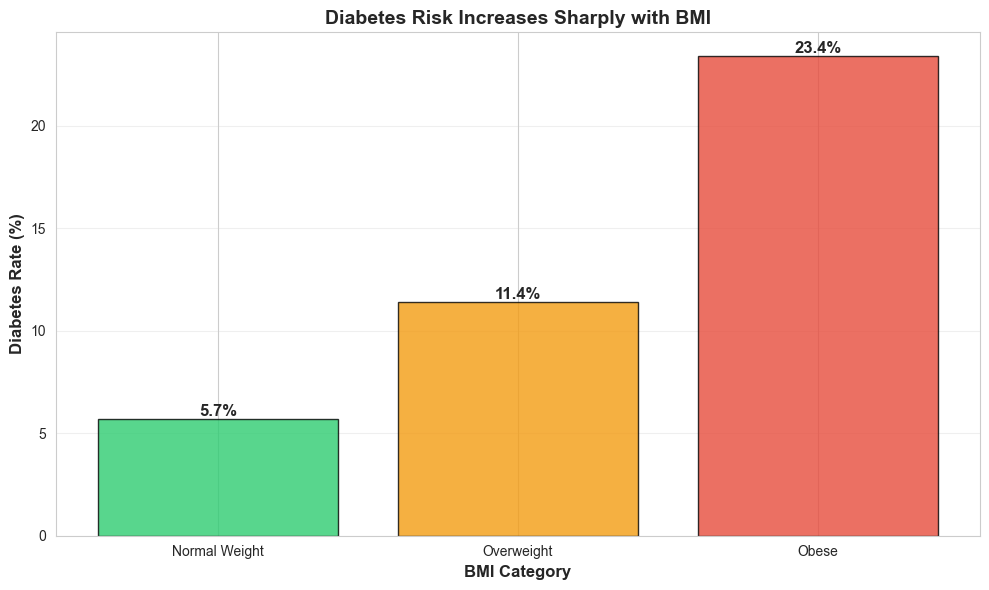


💡 KEY INSIGHT: Obese individuals are 4.1x more likely to have diabetes than normal weight individuals


In [10]:
# BMI Category Analysis
print("=" * 80)
print("Diabetes Rate by BMI Category")
print("=" * 80)

bmi_category_analysis = df_clean.groupby('bmi_category').agg({
    'Diabetes_binary': ['count', 'sum', 'mean']
}).round(4)

bmi_category_analysis.columns = ['Total_People', 'Diabetes_Cases', 'Diabetes_Rate']
bmi_category_analysis['Diabetes_Rate'] = bmi_category_analysis['Diabetes_Rate'] * 100
bmi_category_analysis = bmi_category_analysis.reset_index()

# Order categories
bmi_order = ['Normal Weight', 'Overweight', 'Obese']
bmi_category_analysis['bmi_category'] = pd.Categorical(
    bmi_category_analysis['bmi_category'], categories=bmi_order, ordered=True)
bmi_category_analysis = bmi_category_analysis.sort_values('bmi_category')

print(bmi_category_analysis.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(bmi_category_analysis['bmi_category'], 
              bmi_category_analysis['Diabetes_Rate'],
              color=['#2ecc71', '#f39c12', '#e74c3c'], edgecolor='black', alpha=0.8)

ax.set_ylabel('Diabetes Rate (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('BMI Category', fontsize=12, fontweight='bold')
ax.set_title('Diabetes Risk Increases Sharply with BMI', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/05_bmi_categories.png', dpi=300, bbox_inches='tight')
plt.show()

obese_rate = bmi_category_analysis.loc[bmi_category_analysis['bmi_category']=='Obese', 'Diabetes_Rate'].values[0]
normal_rate = bmi_category_analysis.loc[bmi_category_analysis['bmi_category']=='Normal Weight', 'Diabetes_Rate'].values[0]
print(f"\n💡 KEY INSIGHT: Obese individuals are {obese_rate/normal_rate:.1f}x more likely to have diabetes than normal weight individuals")

BUSINESS QUESTION 4: Lifestyle Factors Impact
                 Group  Total_People  Diabetes_Cases  Diabetes_Rate
    Not Active, Smoker         32097          7156.0          22.29
Not Active, Non-Smoker         29663          5903.0          19.90
        Active, Smoker         80326         11161.0          13.89
    Active, Non-Smoker        111594         11126.0           9.97


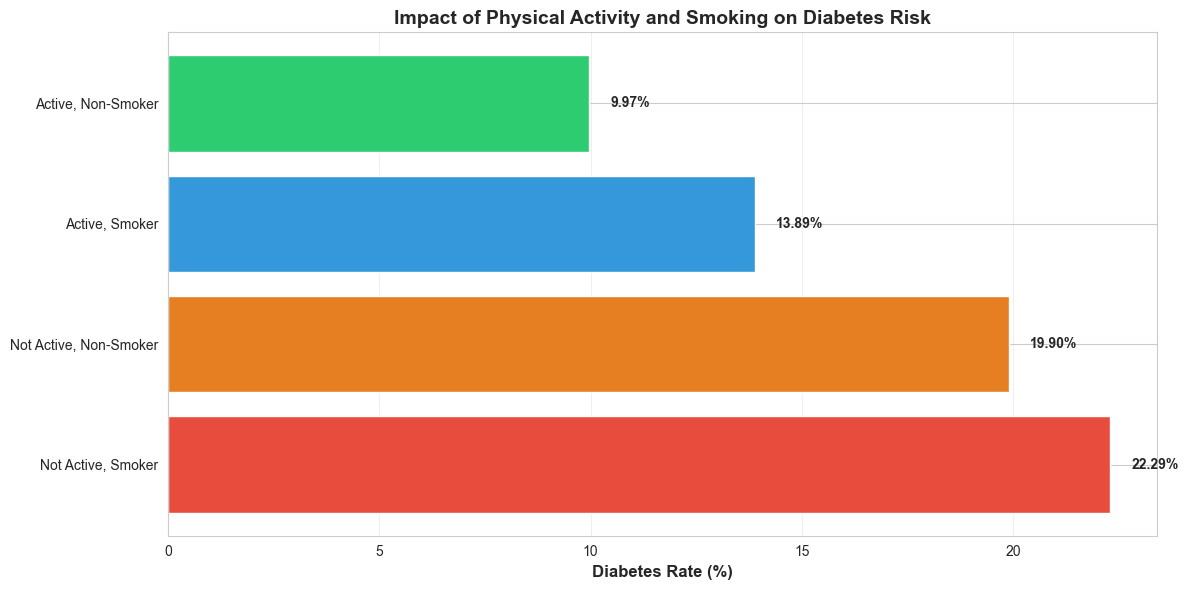


💡 KEY INSIGHT: 'Active, Non-Smoker' has the lowest diabetes rate (9.97%)
   while 'Not Active, Smoker' has the highest rate (22.29%)


In [11]:
# Q4: Lifestyle factor combinations
print("=" * 80)
print("BUSINESS QUESTION 4: Lifestyle Factors Impact")
print("=" * 80)

lifestyle_analysis = df_clean.groupby(['PhysActivity', 'Smoker']).agg({
    'Diabetes_binary': ['count', 'sum', 'mean']
}).round(4)

lifestyle_analysis.columns = ['Total_People', 'Diabetes_Cases', 'Diabetes_Rate']
lifestyle_analysis['Diabetes_Rate'] = lifestyle_analysis['Diabetes_Rate'] * 100
lifestyle_analysis = lifestyle_analysis.reset_index()

# Create readable labels
lifestyle_analysis['Activity_Status'] = lifestyle_analysis['PhysActivity'].map({
    1: 'Active', 0: 'Not Active'})
lifestyle_analysis['Smoking_Status'] = lifestyle_analysis['Smoker'].map({
    1: 'Smoker', 0: 'Non-Smoker'})
lifestyle_analysis['Group'] = (lifestyle_analysis['Activity_Status'] + 
                                ', ' + lifestyle_analysis['Smoking_Status'])

lifestyle_analysis = lifestyle_analysis.sort_values('Diabetes_Rate', ascending=False)
print(lifestyle_analysis[['Group', 'Total_People', 'Diabetes_Cases', 'Diabetes_Rate']].to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(lifestyle_analysis['Group'], lifestyle_analysis['Diabetes_Rate'], 
               color=['#e74c3c', '#e67e22', '#3498db', '#2ecc71'])

ax.set_xlabel('Diabetes Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Impact of Physical Activity and Smoking on Diabetes Risk', 
             fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../images/06_lifestyle_factors.png', dpi=300, bbox_inches='tight')
plt.show()

best_group = lifestyle_analysis.iloc[-1]
worst_group = lifestyle_analysis.iloc[0]
print(f"\n💡 KEY INSIGHT: '{best_group['Group']}' has the lowest diabetes rate ({best_group['Diabetes_Rate']:.2f}%)")
print(f"   while '{worst_group['Group']}' has the highest rate ({worst_group['Diabetes_Rate']:.2f}%)")

BUSINESS QUESTION 5: Highest-Risk Profiles

Top 10 Highest-Risk Profiles:
                       Risk_Profile  Total_People  Diabetes_Cases  Diabetes_Rate
          High BP, High Chol, Obese         30063         11819.0          39.31
     High BP, High Chol, Overweight         23642          5579.0          23.60
        High BP, Normal Chol, Obese         19613          4489.0          22.89
        Normal BP, High Chol, Obese         12983          2187.0          16.85
  High BP, High Chol, Normal Weight         10955          1815.0          16.57
   High BP, Normal Chol, Overweight         15373          2108.0          13.71
   Normal BP, High Chol, Overweight         17622          1608.0           9.12
High BP, Normal Chol, Normal Weight          9183           794.0           8.65
      Normal BP, Normal Chol, Obese         25192          2062.0           8.19
Normal BP, High Chol, Normal Weight         12326           678.0           5.50


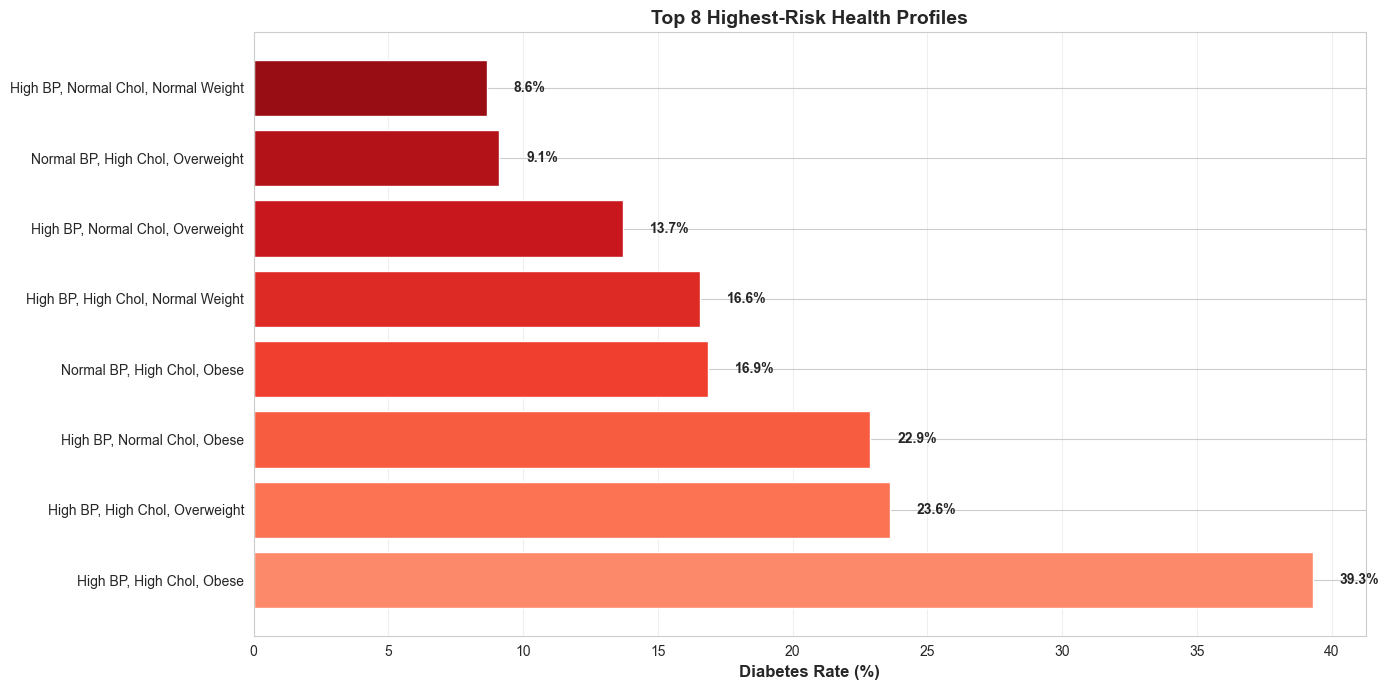


💡 KEY INSIGHT: The highest-risk profile is 'High BP, High Chol, Obese'
   with a 39.3% diabetes rate (11,819 cases)


In [12]:
# Q5: Highest-risk combinations
print("=" * 80)
print("BUSINESS QUESTION 5: Highest-Risk Profiles")
print("=" * 80)

# Analyze combinations of risk factors
high_risk = df_clean.groupby(['HighBP', 'HighChol', 'bmi_category']).agg({
    'Diabetes_binary': ['count', 'sum', 'mean']
}).round(4)

high_risk.columns = ['Total_People', 'Diabetes_Cases', 'Diabetes_Rate']
high_risk['Diabetes_Rate'] = high_risk['Diabetes_Rate'] * 100
high_risk = high_risk.reset_index()

# Filter groups with sufficient sample size
high_risk = high_risk[high_risk['Total_People'] > 1000]

# Create profile description
high_risk['Risk_Profile'] = (
    high_risk['HighBP'].map({1: 'High BP', 0: 'Normal BP'}) + ', ' +
    high_risk['HighChol'].map({1: 'High Chol', 0: 'Normal Chol'}) + ', ' +
    high_risk['bmi_category']
)

high_risk = high_risk.sort_values('Diabetes_Rate', ascending=False)

print("\nTop 10 Highest-Risk Profiles:")
print(high_risk[['Risk_Profile', 'Total_People', 'Diabetes_Cases', 'Diabetes_Rate']].head(10).to_string(index=False))

# Visualization - Top 8 risk profiles
top_risks = high_risk.head(8)

fig, ax = plt.subplots(figsize=(14, 7))
bars = ax.barh(range(len(top_risks)), top_risks['Diabetes_Rate'], 
               color=plt.cm.Reds(np.linspace(0.4, 0.9, len(top_risks))))

ax.set_yticks(range(len(top_risks)))
ax.set_yticklabels(top_risks['Risk_Profile'], fontsize=10)
ax.set_xlabel('Diabetes Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Top 8 Highest-Risk Health Profiles', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../images/07_high_risk_profiles.png', dpi=300, bbox_inches='tight')
plt.show()

highest_risk = high_risk.iloc[0]
print(f"\n💡 KEY INSIGHT: The highest-risk profile is '{highest_risk['Risk_Profile']}'")
print(f"   with a {highest_risk['Diabetes_Rate']:.1f}% diabetes rate ({highest_risk['Diabetes_Cases']:,.0f} cases)")

Correlation Analysis


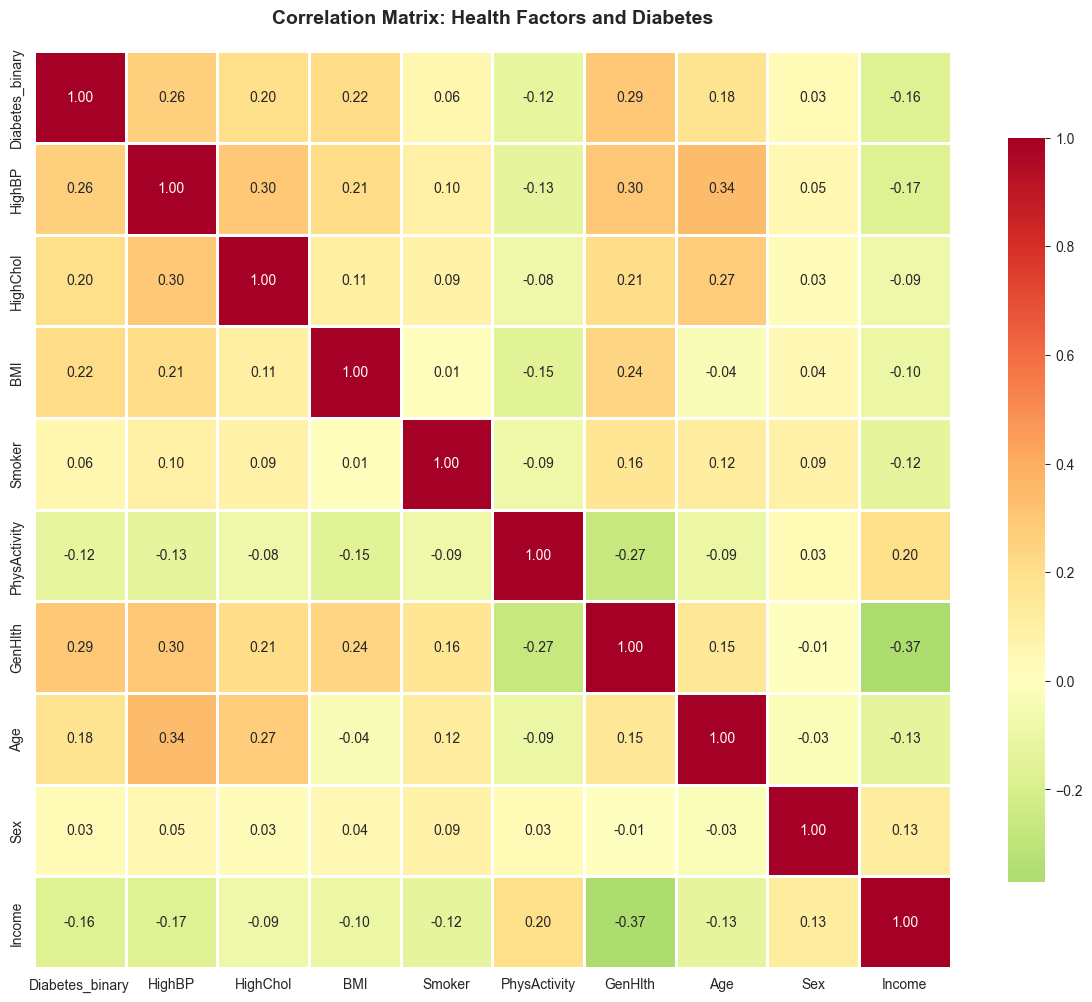


Strongest Correlations with Diabetes:
Diabetes_binary    1.00
GenHlth            0.29
HighBP             0.26
BMI                0.22
HighChol           0.20
Age                0.18
Smoker             0.06
Sex                0.03
PhysActivity      -0.12
Income            -0.16
Name: Diabetes_binary, dtype: float64

💡 KEY INSIGHT: General Health, High BP, and BMI show the strongest correlations with diabetes


In [13]:
# Correlation analysis
print("=" * 80)
print("Correlation Analysis")
print("=" * 80)

# Select numeric columns for correlation
numeric_cols = ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 
                'PhysActivity', 'GenHlth', 'Age', 'Sex', 'Income']

correlation_matrix = df[numeric_cols].corr()

# Visualization
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax)

ax.set_title('Correlation Matrix: Health Factors and Diabetes', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../images/08_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Show strongest correlations with Diabetes
diabetes_correlations = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)
print("\nStrongest Correlations with Diabetes:")
print(diabetes_correlations)

print("\n💡 KEY INSIGHT: General Health, High BP, and BMI show the strongest correlations with diabetes")

In [14]:
# Export cleaned data for Tableau
print("=" * 80)
print("Exporting Data for Tableau Dashboard")
print("=" * 80)

# Export the cleaned view
export_path = '../data/processed/diabetes_clean_for_tableau.csv'
df_clean.to_csv(export_path, index=False)

print(f"✅ Data exported to: {export_path}")
print(f"   Total records: {len(df_clean):,}")
print(f"   Columns: {len(df_clean.columns)}")

# Also create a summary table for Tableau
summary_stats = pd.DataFrame({
    'Metric': ['Total Population', 'Diabetes Cases', 'Diabetes Rate (%)', 
               'Average BMI', 'High BP Rate (%)', 'High Cholesterol Rate (%)'],
    'Value': [
        len(df),
        df['Diabetes_binary'].sum(),
        df['Diabetes_binary'].mean() * 100,
        df['BMI'].mean(),
        df['HighBP'].mean() * 100,
        df['HighChol'].mean() * 100
    ]
})

summary_stats.to_csv('../data/processed/summary_statistics.csv', index=False)
print(f"\n✅ Summary statistics exported")

# Close database connection
conn.close()
print("\n✅ Database connection closed")
print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)
print("\nNext Steps:")
print("1. Review all generated visualizations in the 'images/' folder")
print("2. Open Tableau and connect to 'diabetes_clean_for_tableau.csv'")
print("3. Build the interactive dashboard")

Exporting Data for Tableau Dashboard
✅ Data exported to: ../data/processed/diabetes_clean_for_tableau.csv
   Total records: 253,680
   Columns: 11

✅ Summary statistics exported

✅ Database connection closed

ANALYSIS COMPLETE!

Next Steps:
1. Review all generated visualizations in the 'images/' folder
2. Open Tableau and connect to 'diabetes_clean_for_tableau.csv'
3. Build the interactive dashboard
